<a href="https://colab.research.google.com/github/KayalvizhiT513/Algo_Trading/blob/main/Problems_25Apr2025_Beta_Neutral_Convergence_Trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1:

Consider 2 portfolios, both are well diversified with zero unsystematic risk. The returns of both portfolios align with CAPM.

**Portfolio A**:
- Price: USD 100
- Beta: 1.0
- Return for the period (1 year) where there is mispricing: 8%

**Portfolio B**:
- Price: USD 110
- Beta: 1.0
- Return for the period (1 year) where there is mispricing: 12%

For the last 1 year (period of mispricing), the fair return according to CAPM is 10% p.a.

An event will happen in the next two days that will make sure that the mispricing is corrected. Assume a year has 365 days.

---

## Questions:

1. **Which portfolio is undervalued, which one is overvalued?**

2. **What will be the value of Portfolio A and Portfolio B after 2 days assuming convergence happens?**

3. **Construct a beta neutral portfolio (zero beta) and dollar neutral (zero dollar investment) trade that will take advantage of the convergence.**

4. **Why is this trade strategy better than just going long on the undervalued or just going short on the overvalued portfolio?**

5. **Assuming that the transaction cost of the trade was USD 100, what’s the 2 day return?**

6. **Let’s say there is a sudden market move in 2 days resulting in a steep drop in the market return. This results in the fair return to drop to 8% p.a. instead of 10% p.a. But the convergence does happen. Does the sudden market move impact the ability of the trade setup to benefit from the convergence? Is the trade still profitable given this sudden move?**


# Answers:

1. **Portfolio A is undervalued** and **Portfolio B is overvalued**, because the mispriced return of Portfolio A (8\%) is **less** than the fair return (10\%), and the mispriced return of Portfolio B (12\%) is **greater** than the fair return (10\%).


In [ ]:
# 2.
fair_return = 0.10

# Value of Portfolio A after 2 days
value_PortfolioA = 100
return_PortfolioA = 0.08
beta_PortfolioA = 1.0

initial_value_PortfolioA = value_PortfolioA/(1+return_PortfolioA)
final_value_PortfolioA = initial_value_PortfolioA*(1+fair_return)**(367/365)
print(f"Value of Portfolio A after 2 days: {final_value_PortfolioA}")

# Value of Portfolio B after 2 days
value_PortfolioB = 110
return_PortfolioB = 0.12
beta_PortfolioB = 1.0

initial_value_PortfolioB = value_PortfolioB/(1+return_PortfolioB)
final_value_PortfolioB = initial_value_PortfolioB*(1+fair_return)**(367/365)
print(f"Value of Portfolio B after 2 days: {final_value_PortfolioB}")

Value of Portfolio A after 2 days: 101.90505762510455
Value of Portfolio B after 2 days: 108.0921504094859


In [ ]:
# 3.

# Beta neutral portfolio
return_PortfolioC = -return_PortfolioA + return_PortfolioB
print(f"Return of Beta neutral portfolio: {return_PortfolioC}")

# Dollar neutral portfolio
value_PortfolioC = -value_PortfolioA + value_PortfolioB
print(f"Value of Dollar neutral portfolio: {value_PortfolioC}")

initial_value_PortfolioC = value_PortfolioC/(1+return_PortfolioC)
final_value_PortfolioC = initial_value_PortfolioC*(1+fair_return)**(367/365)
print(f"Value of Beta neutral portfolio after 2 days: {final_value_PortfolioC}")


Return of Beta neutral portfolio: 0.039999999999999994
Value of Dollar neutral portfolio: 10
Value of Beta neutral portfolio after 2 days: 10.58244829183778


In [ ]:
# 4.

# just long portfolioA
profitA = final_value_PortfolioA - value_PortfolioA
print(f"Profit of Portfolio A: {profitA}")

# just long portfolioB
profitB = -final_value_PortfolioB + value_PortfolioB
print(f"Profit of Portfolio B: {profitB}")

Profit of Portfolio A: 1.905057625104547
Profit of Portfolio B: 1.907849590514104


In [ ]:
# Profit when both long and short happens
# final_value_PortfolioA - final_value_PortfolioB + value_PortfolioC
profitC = (final_value_PortfolioA - value_PortfolioA) + (value_PortfolioB - final_value_PortfolioB)
print(f"Profit of Beta neutral portfolio: {profitC}")

Profit of Beta neutral portfolio: 3.812907215618651


In [ ]:
# 5.
# 2 day return after deducting transaction cost
transaction_cost = 100
net_profit = profitC - transaction_cost

invested = value_PortfolioC

_2day_return_percent = (net_profit / invested) * 100
print(f"2-day return after transaction cost (%): {_2day_return_percent}")

2-day return after transaction cost (%): -961.8709278438135


In [ ]:
def portfolio_trade_analysis(n_units):
    fair_return = 0.10

    # Value of Portfolio A and B scaled by n_units
    value_PortfolioA = 100 * n_units
    return_PortfolioA = 0.08
    beta_PortfolioA = 1.0

    value_PortfolioB = 110 * n_units
    return_PortfolioB = 0.12
    beta_PortfolioB = 1.0

    initial_value_PortfolioA = value_PortfolioA / (1 + return_PortfolioA)
    final_value_PortfolioA = initial_value_PortfolioA * (1 + fair_return)**(367/365)
    print(f"Value of Portfolio A after 2 days: {final_value_PortfolioA}")

    initial_value_PortfolioB = value_PortfolioB / (1 + return_PortfolioB)
    final_value_PortfolioB = initial_value_PortfolioB * (1 + fair_return)**(367/365)
    print(f"Value of Portfolio B after 2 days: {final_value_PortfolioB}")

    # Beta neutral portfolio
    return_PortfolioC = -return_PortfolioA + return_PortfolioB
    print(f"Return of Beta neutral portfolio: {return_PortfolioC}")

    # Dollar neutral portfolio
    value_PortfolioC = -value_PortfolioA + value_PortfolioB
    print(f"Value of Dollar neutral portfolio: {value_PortfolioC}")

    initial_value_PortfolioC = value_PortfolioC / (1 + return_PortfolioC)
    final_value_PortfolioC = initial_value_PortfolioC * (1 + fair_return)**(367/365)
    print(f"Value of Beta neutral portfolio after 2 days: {final_value_PortfolioC}")

    # just long portfolioA
    profitA = final_value_PortfolioA - value_PortfolioA
    print(f"Profit of Portfolio A: {profitA}")

    # just long portfolioB
    profitB = -final_value_PortfolioB + value_PortfolioB
    print(f"Profit of Portfolio B: {profitB}")

    # Profit when both long and short happens
    profitC = final_value_PortfolioA - final_value_PortfolioB + value_PortfolioC
    print(f"Profit of Beta neutral portfolio: {profitC}")

    # 2 day return after deducting transaction cost
    transaction_cost = 100
    net_profit = profitC - transaction_cost

    invested = value_PortfolioC

    _2day_return_percent = (net_profit / invested) * 100
    print(f"2-day return after transaction cost (%): {_2day_return_percent}")




In [ ]:
portfolio_trade_analysis(1)     # for 1 unit


Value of Portfolio A after 2 days: 101.90505762510455
Value of Portfolio B after 2 days: 108.0921504094859
Return of Beta neutral portfolio: 0.039999999999999994
Value of Dollar neutral portfolio: 10
Value of Beta neutral portfolio after 2 days: 10.58244829183778
Profit of Portfolio A: 1.905057625104547
Profit of Portfolio B: 1.907849590514104
Profit of Beta neutral portfolio: 3.812907215618651
2-day return after transaction cost (%): -961.8709278438135


In [ ]:
portfolio_trade_analysis(27)    # for 27 units

Value of Portfolio A after 2 days: 2751.436555877823
Value of Portfolio B after 2 days: 2918.4880610561195
Return of Beta neutral portfolio: 0.039999999999999994
Value of Dollar neutral portfolio: 270
Value of Beta neutral portfolio after 2 days: 285.72610387962004
Profit of Portfolio A: 51.43655587782314
Profit of Portfolio B: 51.51193894388052
Profit of Beta neutral portfolio: 102.94849482170366
2-day return after transaction cost (%): 1.0920351191495044


In [ ]:
portfolio_trade_analysis(100)   # for 100 units

Value of Portfolio A after 2 days: 10190.505762510456
Value of Portfolio B after 2 days: 10809.21504094859
Return of Beta neutral portfolio: 0.039999999999999994
Value of Dollar neutral portfolio: 1000
Value of Beta neutral portfolio after 2 days: 1058.2448291837782
Profit of Portfolio A: 190.5057625104564
Profit of Portfolio B: 190.78495905141062
Profit of Beta neutral portfolio: 381.29072156186703
2-day return after transaction cost (%): 28.1290721561867


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_gains_losses(n_units=1, k = 1, transaction_cost=100):
    # Given values
    initial_price_A = 100
    return_A = 0.08
    initial_price_B = 110
    return_B = 0.12

    # Scale prices by number of units
    value_PortfolioA = initial_price_A * n_units * k/initial_price_B
    value_PortfolioB = initial_price_B * n_units * k/initial_price_A

    # Range of fair returns (5% to 15%)
    fair_returns = np.linspace(-0.15, 0.15, 100)

    gains_long_A = []
    gains_short_B = []
    total_net_profit = []
    total_net_return = []

    for fair_return in fair_returns:
        # Compute fair values after 2 days
        init_A = value_PortfolioA / (1 + return_A)
        final_A = init_A * (1 + fair_return) ** (367/365)

        init_B = value_PortfolioB / (1 + return_B)
        final_B = init_B * (1 + fair_return) ** (367/365)

        # Long A profit = Sell price - Buy price
        profit_A = final_A - value_PortfolioA

        # Short B profit = Short sell price - Buy back price
        profit_B = value_PortfolioB - final_B

        # Total profit (Long A + Short B) minus transaction cost
        profit_total = profit_A + profit_B - transaction_cost

        return_total = profit_total / transaction_cost

        gains_long_A.append(profit_A)
        gains_short_B.append(profit_B)
        total_net_profit.append(profit_total)
        total_net_return.append(return_total)

    # Plotting
    plt.figure(figsize=(10,6))
    plt.plot(fair_returns * 100, gains_long_A, label="Long A (Buy Low, Sell High)", color="blue")
    plt.plot(fair_returns * 100, gains_short_B, label="Short B (Sell High, Buy Low)", color="red")
    plt.plot(fair_returns * 100, total_net_profit, label="Total Net Profit", color="green", linestyle="--")
    # plt.plot(fair_returns * 100, total_net_return, label="Total Net Return", color="orange", linestyle="--")

    # plt.axhline(0, color="black", linestyle="--")
    plt.axvline(10, color="gray", linestyle="--", label="Fair Return = 10%")

    plt.xlabel("Fair Return (%)")
    plt.ylabel("Profit/Loss (USD)")
    plt.title(f"Gains/Losses in Long-Short Strategy for {n_units} unit(s)")
    plt.legend()
    plt.grid(True)
    plt.show()


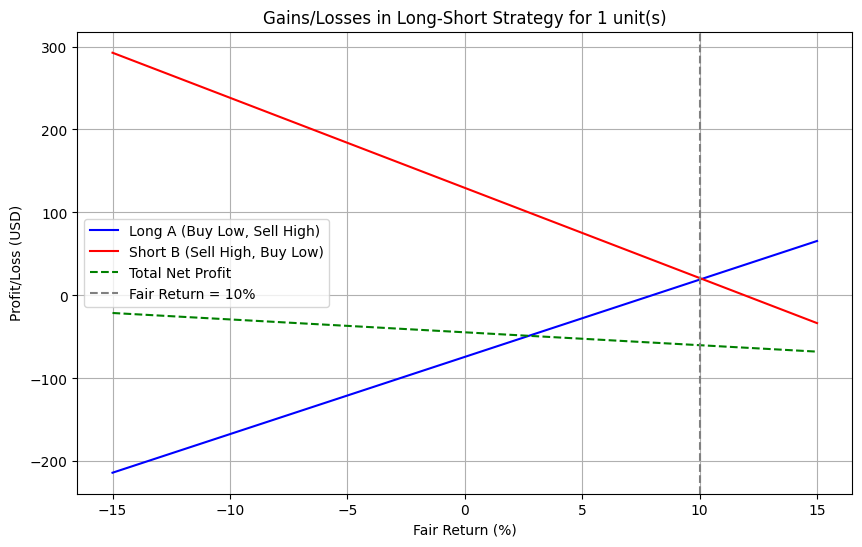

In [ ]:
plot_gains_losses(n_units=1, k= 1100)    # Run for 1 unit

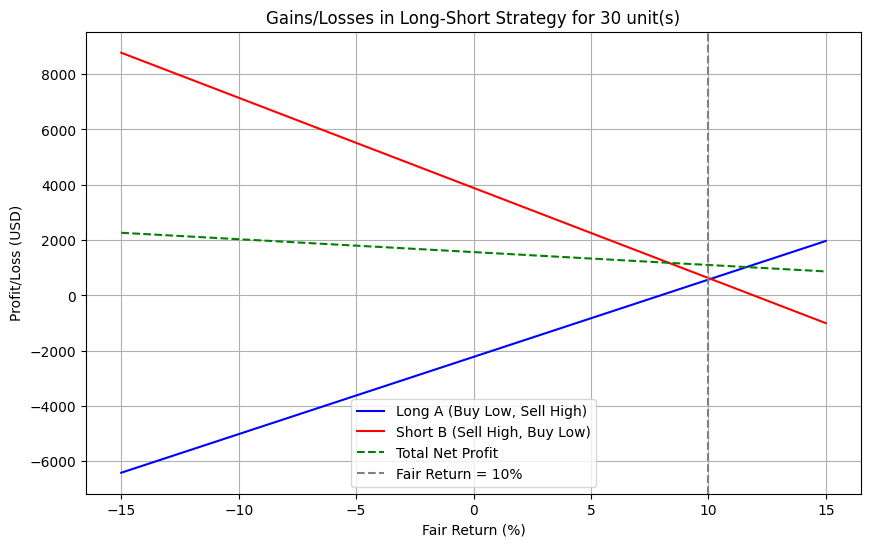

In [ ]:
plot_gains_losses(n_units=30, k=1100)    # Run for 30 unit

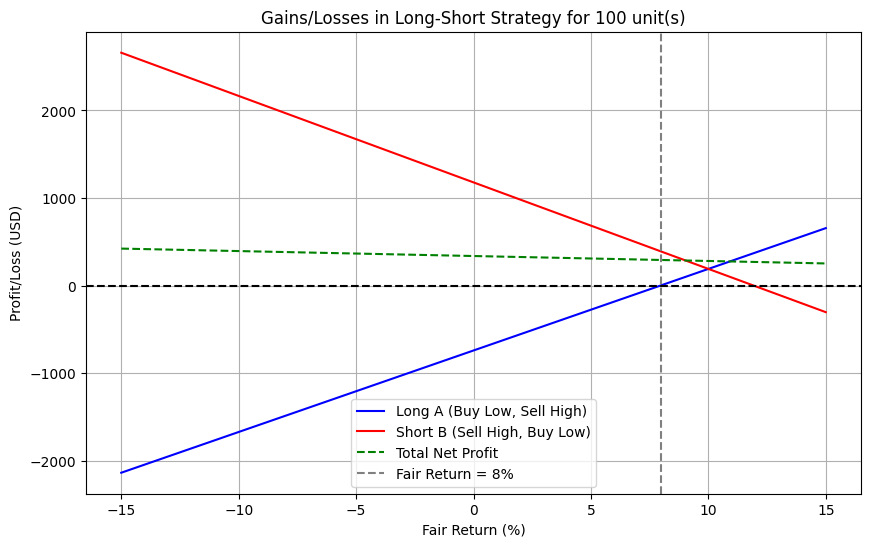

In [ ]:
plot_gains_losses(n_units=100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fair_return_vs_portfolio_return(n_units=1, k = 1, transaction_cost=100):
    # Given values
    initial_price_A = 100
    return_A = 0.08
    initial_price_B = 110
    return_B = 0.12

    # Scale prices by number of units
    n_units_A = k / initial_price_A
    n_units_B = k / initial_price_B
    value_PortfolioA = initial_price_A * n_units_A
    value_PortfolioB = initial_price_B * n_units_B

    # Range of fair returns (5% to 15%)
    fair_returns = np.linspace(-0.15, 0.15, 100)

    gains_long_A = []
    gains_short_B = []
    total_net_profit = []
    total_net_return = []

    for fair_return in fair_returns:
        # Compute fair values after 2 days
        init_A = value_PortfolioA / (1 + return_A)
        final_A = init_A * (1 + fair_return) ** (367/365)

        init_B = value_PortfolioB / (1 + return_B)
        final_B = init_B * (1 + fair_return) ** (367/365)

        # Long A profit = Sell price - Buy price
        profit_A = final_A - value_PortfolioA

        # Short B profit = Short sell price - Buy back price
        profit_B = value_PortfolioB - final_B

        # Total profit (Long A + Short B) minus transaction cost
        profit_total = profit_A + profit_B - transaction_cost

        return_total = profit_total / transaction_cost

        gains_long_A.append(profit_A)
        gains_short_B.append(profit_B)
        total_net_profit.append(profit_total)
        total_net_return.append(return_total)

    # Plotting
    plt.figure(figsize=(10,6))
    # plt.plot(fair_returns * 100, gains_long_A, label="Long A (Buy Low, Sell High)", color="blue")
    # plt.plot(fair_returns * 100, gains_short_B, label="Short B (Sell High, Buy Low)", color="red")
    # plt.plot(fair_returns * 100, total_net_profit, label="Total Net Profit", color="green", linestyle="--")
    plt.plot(fair_returns * 100, total_net_return, label="Portfolio Return", color="orange", linestyle="--")

    # plt.axhline(0, color="black", linestyle="--")
    plt.axvline(10, color="gray", linestyle="--", label="Fair Return = 10%")

    plt.xlabel("Fair Return (%)")
    plt.ylabel("Portfolio Return after convergence (%)")
    plt.title(f"Gains/Losses in Long-Short Strategy for {n_units_A} unit(s) of A and {n_units_B} unit(s) of B")
    plt.legend()
    plt.grid(True)
    plt.show()


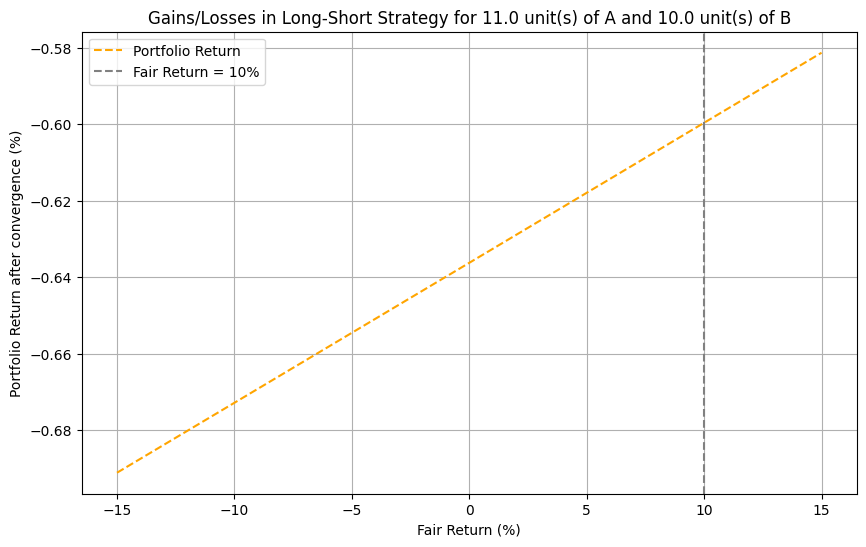

In [ ]:
plot_fair_return_vs_portfolio_return(n_units=1, k=1100)

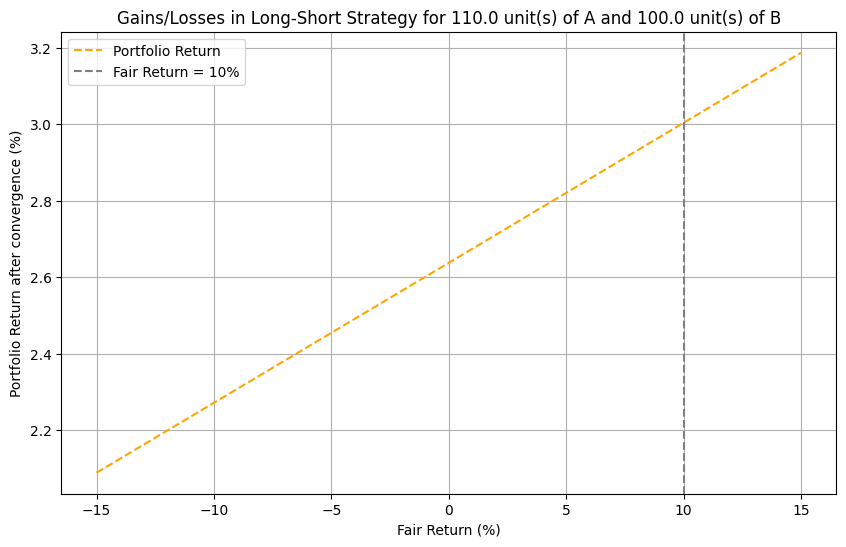

In [ ]:
plot_fair_return_vs_portfolio_return(n_units=10, k=11000)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fair_return_vs_pfRet_variable_tc(n_units=1, k = 1, transaction_cost=0.1):
    # Given values
    initial_price_A = 100
    return_A = 0.08
    initial_price_B = 110
    return_B = 0.12

    # Scale prices by number of units
    n_units_A = k / initial_price_A
    n_units_B = k / initial_price_B
    value_PortfolioA = initial_price_A * n_units_A
    value_PortfolioB = initial_price_B * n_units_B

    # Range of fair returns (5% to 15%)
    fair_returns = np.linspace(-0.15, 0.15, 100)

    transaction_cost = (n_units_A + n_units_B) * transaction_cost

    gains_long_A = []
    gains_short_B = []
    total_net_profit = []
    total_net_return = []

    for fair_return in fair_returns:
        # Compute fair values after 2 days
        init_A = value_PortfolioA / (1 + return_A)
        final_A = init_A * (1 + fair_return) ** (367/365)

        init_B = value_PortfolioB / (1 + return_B)
        final_B = init_B * (1 + fair_return) ** (367/365)

        # Long A profit = Sell price - Buy price
        profit_A = final_A - value_PortfolioA

        # Short B profit = Short sell price - Buy back price
        profit_B = value_PortfolioB - final_B

        # Total profit (Long A + Short B) minus transaction cost
        profit_total = profit_A + profit_B - transaction_cost

        return_total = profit_total / transaction_cost

        gains_long_A.append(profit_A)
        gains_short_B.append(profit_B)
        total_net_profit.append(profit_total)
        total_net_return.append(return_total*100)

    # Plotting
    plt.figure(figsize=(10,6))
    # plt.plot(fair_returns * 100, gains_long_A, label="Long A (Buy Low, Sell High)", color="blue")
    # plt.plot(fair_returns * 100, gains_short_B, label="Short B (Sell High, Buy Low)", color="red")
    # plt.plot(fair_returns * 100, total_net_profit, label="Total Net Profit", color="green", linestyle="--")
    plt.plot(fair_returns * 100, total_net_return, label="Portfolio Return", color="orange", linestyle="--")

    # plt.axhline(0, color="black", linestyle="--")
    plt.axvline(10, color="gray", linestyle="--", label="Fair Return = 10%")

    plt.xlabel("Fair Return (%)")
    plt.ylabel("Portfolio Return after convergence (%)")
    plt.title(f"Gains/Losses in Long-Short Strategy for {n_units_A} unit(s) of A and {n_units_B} unit(s) of B")
    plt.legend()
    plt.grid(True)
    plt.show()


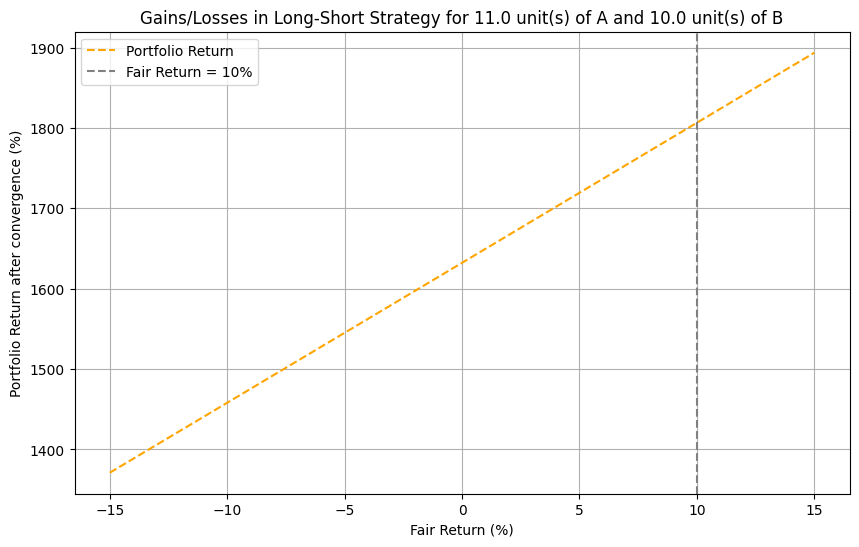

In [ ]:
plot_fair_return_vs_pfRet_variable_tc(n_units=10, k=1100)

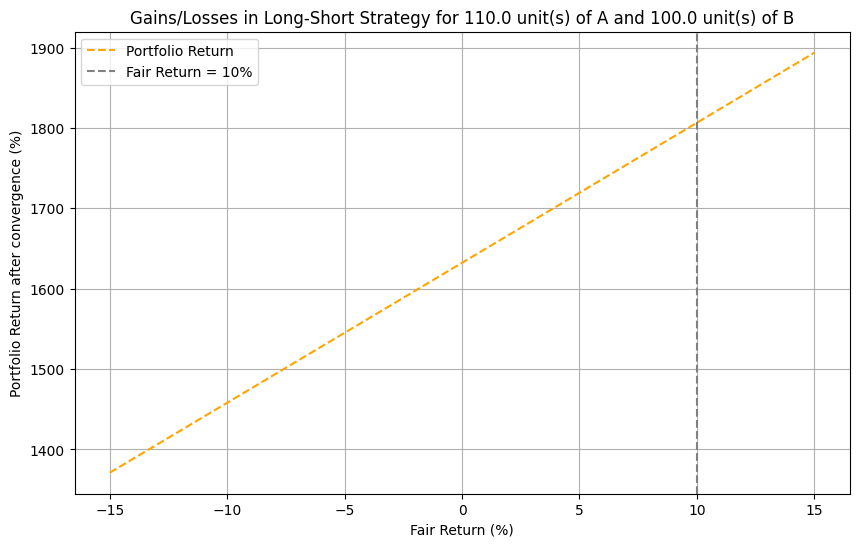

In [ ]:
plot_fair_return_vs_pfRet_variable_tc(n_units=10, k=11000)

In [ ]:
# generate n random fair returns between -15% and 15% and calculate corresponding portfolio return. Mean of n portfolio return will be its expected value

def estimate_expected_portfolio_return(k = 1100, transaction_cost=0.1):
    # Given values
    initial_price_A = 100
    return_A = 0.08
    initial_price_B = 110
    return_B = 0.12

    # Scale prices by number of units
    n_units_A = k / initial_price_A
    n_units_B = k / initial_price_B
    value_PortfolioA = initial_price_A * n_units_A
    value_PortfolioB = initial_price_B * n_units_B

    # Range of fair returns (5% to 15%)
    n = 10000
    fair_returns = np.linspace(-0.15, 0.15, n)

    transaction_cost = (n_units_A + n_units_B) * transaction_cost

    gains_long_A = []
    gains_short_B = []
    total_net_profit = []
    total_net_return = []

    for fair_return in fair_returns:
        # Compute fair values after 2 days
        init_A = value_PortfolioA / (1 + return_A)
        final_A = init_A * (1 + fair_return) ** (367/365)

        init_B = value_PortfolioB / (1 + return_B)
        final_B = init_B * (1 + fair_return) ** (367/365)

        # Long A profit = Sell price - Buy price
        profit_A = final_A - value_PortfolioA

        # Short B profit = Short sell price - Buy back price
        profit_B = value_PortfolioB - final_B

        # Total profit (Long A + Short B) minus transaction cost
        profit_total = profit_A + profit_B - transaction_cost

        return_total = profit_total / transaction_cost

        gains_long_A.append(profit_A)
        gains_short_B.append(profit_B)
        total_net_profit.append(profit_total)
        total_net_return.append(return_total)

    expected_portfolio_return = sum(total_net_return)/n

    return expected_portfolio_return



In [ ]:
estimate_expected_portfolio_return()

np.float64(16.322102264424068)

In [ ]:
37.9/2.1

18.047619047619047